In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [7]:
df = pd.read_csv("/Users/anshulchhaparwal/Downloads/Major Project/My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
print("Number of rows:",df.shape[0],"and number of columns:",df.shape[1])

Number of rows: 1156 and number of columns: 7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Data Cleaning

In [11]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [12]:
df.rename(columns={'START_DATE*':'start_date','END_DATE*':'end_date','CATEGORY*':'category','START*':'start','STOP*':'stop','MILES*':'miles','PURPOSE*':'purpose'},inplace=True)

In [13]:
df.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [14]:
df.isnull()

,start_date,end_date,category,start,stop,miles,purpose
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [15]:
df.iloc[[1155]]

,start_date,end_date,category,start,stop,miles,purpose
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [16]:
df.drop([1155],axis=0,inplace=True)

In [17]:
df['start_date']=pd.to_datetime(df['start_date'])
df['end_date']=pd.to_datetime(df['end_date'])

In [18]:
df[df.duplicated()]

,start_date,end_date,category,start,stop,miles,purpose
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting


In [19]:
df.drop([492],axis=0,inplace=True)

In [20]:
df.isna().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       502
dtype: int64

In [21]:
df['purpose'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64

In [22]:
df['purpose']=df['purpose'].replace(np.nan,'Purpose Not Defined')

In [23]:
df.isna().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
dtype: int64

In [24]:
df['purpose'].value_counts()

Purpose Not Defined    502
Meeting                186
Meal/Entertain         160
Errand/Supplies        128
Customer Visit         101
Temporary Site          50
Between Offices         18
Moving                   4
Airport/Travel           3
Charity ($)              1
Commute                  1
Name: purpose, dtype: int64

In [25]:
df[df.start.str.contains('\?') == True]

,start_date,end_date,category,start,stop,miles,purpose
140,2016-02-20 14:50:00,2016-02-20 15:54:00,Business,R?walpindi,R?walpindi,23.1,Meeting
141,2016-02-20 16:59:00,2016-02-20 17:54:00,Personal,R?walpindi,Unknown Location,16.5,Purpose Not Defined
656,2016-08-15 09:05:00,2016-08-15 09:52:00,Business,R?walpindi,Unknown Location,15.6,Purpose Not Defined
670,2016-08-17 15:32:00,2016-08-17 15:47:00,Business,R?walpindi,Islamabad,6.4,Purpose Not Defined
679,2016-08-19 10:57:00,2016-08-19 11:06:00,Business,R?walpindi,Unknown Location,2.0,Purpose Not Defined
696,2016-08-22 20:53:00,2016-08-22 21:31:00,Business,R?walpindi,R?walpindi,4.1,Purpose Not Defined
697,2016-08-22 22:31:00,2016-08-22 23:00:00,Business,R?walpindi,Unknown Location,18.7,Purpose Not Defined
763,2016-09-19 06:18:00,2016-09-19 06:49:00,Business,R?walpindi,Unknown Location,18.2,Purpose Not Defined
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,Purpose Not Defined
804,2016-10-12 19:18:00,2016-10-12 19:21:00,Business,R?walpindi,Unknown Location,18.4,Purpose Not Defined


In [26]:
df['start'] = df['start'].replace({"\?":"a"}, regex = True)
df["stop"] = df["stop"].replace({"\?":"a"}, regex = True)

# Data Analysis and Visualization

In [28]:
filtered_df = df[df['purpose'] != "Purpose Not Defined"]

fig = px.bar(filtered_df,
       x=filtered_df['purpose'].value_counts().keys(),y=filtered_df['purpose'].value_counts(),
       color=filtered_df['purpose'].value_counts().keys(),title='Purpose To Travel'
      )

fig.update_layout(xaxis_title='Purpose', yaxis_title='Number of Rides')

We can estimate that users most used Uber for work-related meetings and meals most of the time. Other significant purposes include errands and customer visits. We can presume that the user works in a client-oriented service industry that involves frequent traveling and dining with clients in the city.

In [29]:
df['category'].value_counts()

Business    1077
Personal      77
Name: category, dtype: int64

In [30]:
df['category'].value_counts().keys()

Index(['Business', 'Personal'], dtype='object')

In [31]:
fig = px.pie(df['category'].value_counts(), values=df['category'].value_counts().values, 
             names=df['category'].value_counts().index, 
             hole = 0.3 , 
             color_discrete_sequence = px.colors.sequential.Jet
            )

fig.update_layout(title = "Category Distribution", 
                 annotations= [dict(text = "Ride Share" , font_size = 15 , showarrow = False , opacity = 0.7)])

fig.update_traces ( pull = 0.03 , textinfo = "percent+label")
fig.show()

In [32]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(df[df['category'] == 'Business'].miles.mean(), 3))
print('Personal:', round(df[df['category'] == 'Personal'].miles.mean(), 3))


..........Average Length of the Trip..............

Business: 10.657
Personal: 9.321


It is clear that users most used Uber for work-related meetings

In [33]:
fig = px.histogram(
    df, 
    x='miles', title="Number of Trips by Miles",
)
fig.update_layout(xaxis_title='Miles Range', yaxis_title='Number of Rides')
fig.show()

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short, which validates our assumption about the user’s work-related travels.

In [34]:
df['month_name']=df['start_date'].dt.month_name()
df['day_name']=df['start_date'].dt.day_name()
df['hour'] =  [x.hour for x in df['start_date']]
df.head()


,start_date,end_date,category,start,stop,miles,purpose,month_name,day_name,hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Purpose Not Defined,January,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14


In [35]:
df['month_name'].value_counts()

December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: month_name, dtype: int64

In [36]:
fig = px.bar(df
       ,x=df['month_name'].value_counts().keys(),y=df['month_name'].value_counts(),
       color=df['month_name'].value_counts().keys(),
       title='Number of trips by Month'
      )
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Rides')
fig.show()

There were significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

In [37]:
df_counts = df['day_name'].value_counts()

fig = px.pie(
    df_counts, values=df_counts.values, 
    names=df_counts.index, 
    hole=0.7)

fig.update_layout( annotations= [dict(text = "Week Days" , font_size = 25 , showarrow = False , opacity = 0.7)])

fig.update_traces ( pull = 0.03 , textinfo = "percent+label")
fig.show()

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the evenings too, we can assume that the additional number of trips on Fridays might be recreational.

In [38]:
dfx = df[ 'start' ].value_counts().nlargest(10).sort_values(ascending=True)
dfx

Apex                 17
Raleigh              28
Karachi              31
Lahore               36
Durham               36
Islamabad            57
Whitebridge          68
Morrisville          85
Unknown Location    148
Cary                201
Name: start, dtype: int64

In [39]:
filtered_df = df[df['start'] != "Unknown Location"]
dfx = filtered_df[ 'start' ].value_counts().nlargest(10).sort_values(ascending=True)
fig = px.bar(
    filtered_df,
    x=dfx.keys(),y=dfx,
    color=dfx.keys(),
    title='Number of Trips by Pickup points'
)
fig.update_layout(xaxis_title='Pick-up Point', yaxis_title='Number of Rides')
fig.show()

The skewed number of trips start from Cary could mean that the user either resides or works in this region.

In [40]:
dfx_drop = df[ 'stop' ].value_counts().nlargest(10).sort_values(ascending=True)
dfx_drop

Rawalpindi           18
Karachi              28
Raleigh              29
Lahore               36
Durham               36
Islamabad            58
Whitebridge          65
Morrisville          84
Unknown Location    149
Cary                202
Name: stop, dtype: int64

In [41]:
filtered_df = df[df['stop'] != "Unknown Location"]
dfx_drop = filtered_df[ 'stop' ].value_counts().nlargest(10).sort_values(ascending=True)
px.bar(filtered_df, x=dfx_drop.keys(), y=dfx_drop, color=dfx_drop.keys(), title='Number of Trips by Drop points')
fig.update_layout(xaxis_title='Drop Point', yaxis_title='Number of Rides')
fig.show()

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the user usually commutes around Cary or Morrisville.

Text(0.5, 1.0, 'points - points Trips Counts')

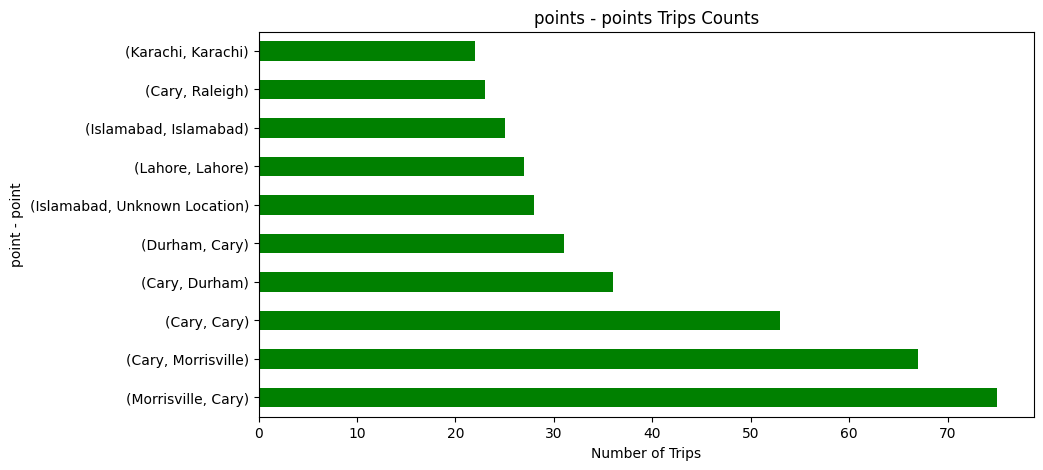

In [42]:
filtered_df = df[df['start'] != "Unknown Location"]
p_p = filtered_df[[ 'start', 'stop'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

The user travels very frequently between Cary and Morrisville.

In [43]:
df_mon_day=df.groupby(['month_name','day_name']).agg({'day_name':'count'}).rename(columns={'day_name':'day_name_count'}).reset_index()
df_mon_day.head()

,month_name,day_name,day_name_count
0,April,Friday,20
1,April,Saturday,12
2,April,Sunday,4
3,April,Thursday,7
4,April,Tuesday,8


In [44]:
df_mon_day.sort_values(by='day_name_count',ascending=False).head()

,month_name,day_name,day_name_count
7,August,Monday,35
17,December,Thursday,31
11,August,Tuesday,27
20,February,Friday,25
19,December,Wednesday,25


In [45]:
df_mon_day=df.groupby(['month_name','day_name']).agg({'day_name':'count'}).rename(columns={'day_name':'day_name_count'}).reset_index()
px.bar(df_mon_day,x='month_name',y='day_name_count',color='day_name',title='Month Day To Travel')

In [46]:
hours = df['hour'].value_counts().reset_index(name='count')

fig = px.bar(hours, x='index', y='count', color='index',
             title='Number of Trips Vs Hours',
             labels={'index': 'Hours', 'count': 'Number of Trips'})
fig.show()

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day. It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

In [47]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame has columns 'day', 'pickup_point', and 'distance'
# Replace with your actual DataFrame
# Example:
# df = ...

# Create a figure using Plotly Express
fig = px.scatter(df, x='day', y='pickup_point', size='distance', color='distance', title='Day-wise Pickup Points with Distance')

# Customize the layout
fig.update_layout(
    xaxis_title='Day',
    yaxis_title='Pickup Point',
    coloraxis_colorbar_title='Distance',
)

# Show the figure
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['start_date', 'end_date', 'category', 'start', 'stop', 'miles', 'purpose', 'month_name', 'day_name', 'hour'] but received: day